In [12]:
# filtrando os dados para tirar os que não estavam presentes, treineiros e redações zeradas
import pandas as pd 

microdados_enem=pd.read_csv('microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv', encoding="latin2", sep=";")

df_filtro_treineiro=microdados_enem['IN_TREINEIRO']==0
df_filtro_presenca_cn =microdados_enem['TP_PRESENCA_CN']==1
df_filtro_presenca_ch =microdados_enem[ 'TP_PRESENCA_CH']==1
df_filtro_presenca_lc =microdados_enem[ 'TP_PRESENCA_LC']==1
df_filtro_presenca_mt =microdados_enem[ 'TP_PRESENCA_MT' ]==1
df_filtro_redacao=microdados_enem['TP_STATUS_REDACAO']==1

mcdados_filtrado=microdados_enem[df_filtro_presenca_cn & df_filtro_presenca_ch & df_filtro_presenca_lc & df_filtro_presenca_mt  & df_filtro_treineiro & df_filtro_redacao]

mcdados_filtrado.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
7,210055778089,2022,6,F,1,2,1,1,0,1,...,B,A,A,C,A,A,E,A,A,B
9,210055461467,2022,4,F,1,3,1,1,1,1,...,A,A,A,B,A,A,B,A,A,B
11,210054972570,2022,2,F,1,1,1,2,0,3,...,A,A,A,B,A,A,C,A,A,B
18,210057551883,2022,8,F,1,2,1,1,5,1,...,A,A,A,B,A,A,D,A,A,B
22,210056235859,2022,4,F,1,1,1,1,0,1,...,B,A,A,B,B,A,C,A,B,B
23,210057706656,2022,4,M,1,3,1,1,1,1,...,A,A,A,C,A,A,B,A,A,B
25,210055139127,2022,5,M,1,3,1,1,4,1,...,B,A,A,A,A,A,A,A,A,B
27,210057728624,2022,7,M,1,2,1,1,3,1,...,B,A,A,B,B,A,D,A,B,B


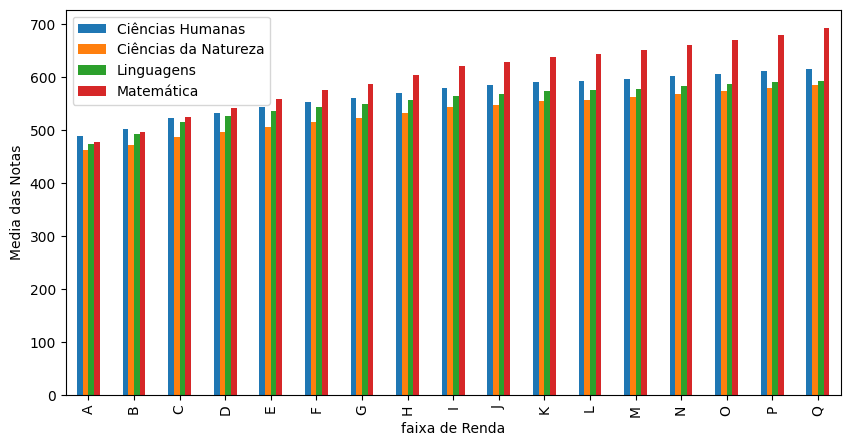

In [ ]:
#fazendo a media por renda 
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
#pegando as notas e a renda
df_renda=mcdados_filtrado[["NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","Q006"]]


medias_por_renda = df_renda.groupby("Q006").mean()

faixas_de_renda = [
    "Até R$ 1.212,00",
    "De R$ 1.212,01 até R$ 1.818,00",
    "De R$ 1.818,01 até R$ 2.424,00",
    "De R$ 2.424,01 até R$ 3.030,00",
    "De R$ 3.030,01 até R$ 3.636,00",
    "De R$ 3.636,01 até R$ 4.848,00",
    "De R$ 4.848,01 até R$ 6.060,00",
    "De R$ 6.060,01 até R$ 7.272,00",
    "De R$ 7.272,01 até R$ 8.484,00",
    "De R$ 8.484,01 até R$ 9.696,00",
    "De R$ 9.696,01 até R$ 10.908,00",
    "De R$ 10.908,01 até R$ 12.120,00",
    "De R$ 12.120,01 até R$ 14.544,00",
    "De R$ 14.544,01 até R$ 18.180,00",
    "De R$ 18.180,01 até R$ 24.240,00"
]

medias_por_renda.plot.bar(stacked=False, figsize=(10,5),xlabel=faixas_de_renda)
plt.ylabel("Media das Notas")
plt.xlabel('faixa de Renda')
plt.legend(['Ciências Humanas','Ciências da Natureza','Linguagens','Matemática'])
plt.show()


